## Observations and Insights 

In [181]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [182]:
# Checking the number of mice in the DataFrame.
mice_no = len(merged_df['Mouse ID'].unique())
mice_no

249

In [183]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mices = merged_df['Mouse ID'].unique()
indexed_mice = merged_df.set_index('Mouse ID')
#mice_data = list()
#for mice in mices:
   # filtered_mice = indexed_mice.loc[mice]
   # mice_data.append([
    #    mice,
     #   filtered_mice['Timepoint'].unique()
  #  ])
dropped_mice = indexed_mice.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
dropped_mice


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,0,45.000000,0
a203,Infubinol,Female,20,23,5,48.508468,0
a203,Infubinol,Female,20,23,10,51.852437,1
a203,Infubinol,Female,20,23,15,52.777870,1
a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [184]:
# Optional: Get all the data for the duplicate mouse ID. 


In [185]:
# Create a clean DataFrame by dropping the duplicate mouse by its I
dropped_mice



,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,0,45.000000,0
a203,Infubinol,Female,20,23,5,48.508468,0
a203,Infubinol,Female,20,23,10,51.852437,1
a203,Infubinol,Female,20,23,15,52.777870,1
a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [186]:
# Checking the number of mice in the clean DataFrame.
print(len(mices))

249


## Summary Statistics

In [187]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugs = dropped_mice['Drug Regimen'].unique()
drugs_df = dropped_mice.set_index('Drug Regimen')
drug_data = list()

for drug in drugs:
    filtered_drug_data = drugs_df.loc[drug]
    drug_data.append([
        drug,
        filtered_drug_data['Tumor Volume (mm3)'].mean(),
        filtered_drug_data['Tumor Volume (mm3)'].median(),
        filtered_drug_data['Tumor Volume (mm3)'].std(),
        filtered_drug_data['Tumor Volume (mm3)'].sem(),
       
    ])
    
summary_df = pd.DataFrame(drug_data,columns=['Drug Regimen','Mean','Median','STD','SEM'])
summary_df

,Drug Regimen,Mean,Median,STD,SEM
0,Infubinol,53.019963,51.852437,6.540796,0.494438
1,Placebo,54.134515,52.343085,7.805652,0.583422
2,Ceftamin,52.591172,51.776157,6.268188,0.469821
3,Stelasyn,54.233149,52.431737,7.710419,0.573111
4,Zoniferol,53.282012,51.826638,6.958737,0.517239
5,Ramicane,40.195673,40.668343,4.846539,0.321676
6,Ketapril,55.235638,53.698743,8.279709,0.603860
7,Propriva,52.368318,50.909965,6.502160,0.514041
8,Naftisol,54.331565,52.509285,8.134708,0.596466
9,Capomulin,40.675741,41.557809,4.994774,0.329346


In [188]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
groupby = dropped_mice.groupby('Drug Regimen')
groupby_mean = dropped_mice.groupby('Drug Regimen').mean()
groupby_med = dropped_mice.groupby('Drug Regimen').median()
groupby_std = dropped_mice.groupby('Drug Regimen').std()
groupby_sem = dropped_mice.groupby('Drug Regimen').sem()
groupby_mean

summary_drugs = pd.DataFrame((drugs,groupby_mean['Tumor Volume (mm3)'],groupby_med['Tumor Volume (mm3)'],groupby_std['Tumor Volume (mm3)'],groupby_sem['Tumor Volume (mm3)']),columns=["","","","","",'','','','',''])
edited_summary = summary_drugs.transpose()

renamed_summary = edited_summary.rename(columns={0:'Drug Regimen',1:'Mean',2:'Median',3:'STD',4:'SEM'})
renamed_summary
    
    # This method produces everything in a single groupby function.

,Drug Regimen,Mean,Median,STD,SEM
,Infubinol,40.6757,41.5578,4.99477,0.329346
,Placebo,52.5912,51.7762,6.26819,0.469821
,Ceftamin,53.02,51.8524,6.5408,0.494438
,Stelasyn,55.2356,53.6987,8.27971,0.60386
,Zoniferol,54.3316,52.5093,8.13471,0.596466
,Ramicane,54.1345,52.3431,7.80565,0.583422
,Ketapril,52.3683,50.91,6.50216,0.514041
,Propriva,40.1957,40.6683,4.84654,0.321676
,Naftisol,54.2331,52.4317,7.71042,0.573111
,Capomulin,53.282,51.8266,6.95874,0.517239


## Bar Plots

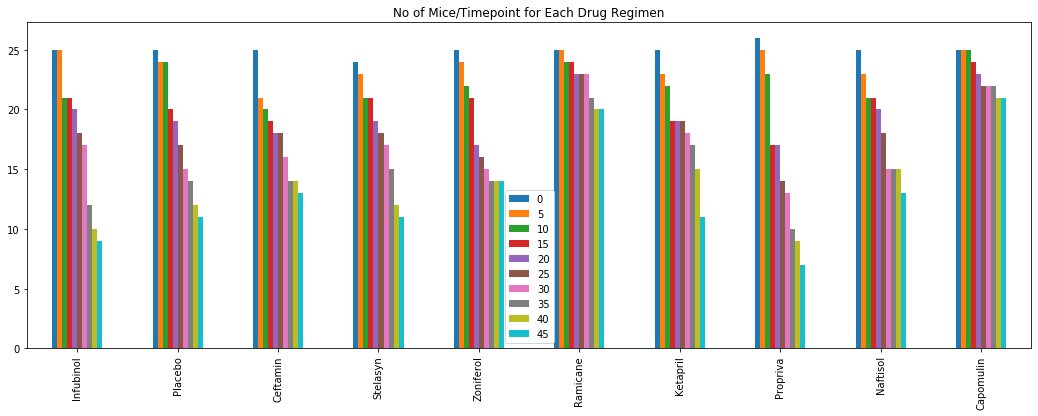

In [189]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
## of mice per timepoint, each treatment
drugs = merged_df['Drug Regimen'].unique()
drugs_df = merged_df.set_index('Drug Regimen')
drug_datas = list()

for drug in drugs:
    filtered_drug_data = drugs_df.loc[drug]
    drug_data = dict()
    for timepoint in filtered_drug_data["Timepoint"].unique():
        time_filtered_drug_data = filtered_drug_data.set_index("Timepoint").loc[timepoint]
        drug_data[timepoint] = len(time_filtered_drug_data['Mouse ID'])
    drug_datas.append(drug_data)
    
drug_datas_df = pd.DataFrame(drug_datas)
renamed_datas_df = drug_datas_df.rename(index={0:'Infubinol',1:'Placebo',2:'Ceftamin',3:'Stelasyn',4:'Zoniferol',5:'Ramicane',6:'Ketapril',7:'Propriva',8:'Naftisol',9:'Capomulin'})
    
#Make bar graph

renamed_datas_df.plot.bar(figsize=(18,6))
       
# Give the chart a title, x label, and y label
plt.title("No of Mice/Timepoint for Each Drug Regimen")

plt.savefig("MicePerTimepoint.png")
plt.show()


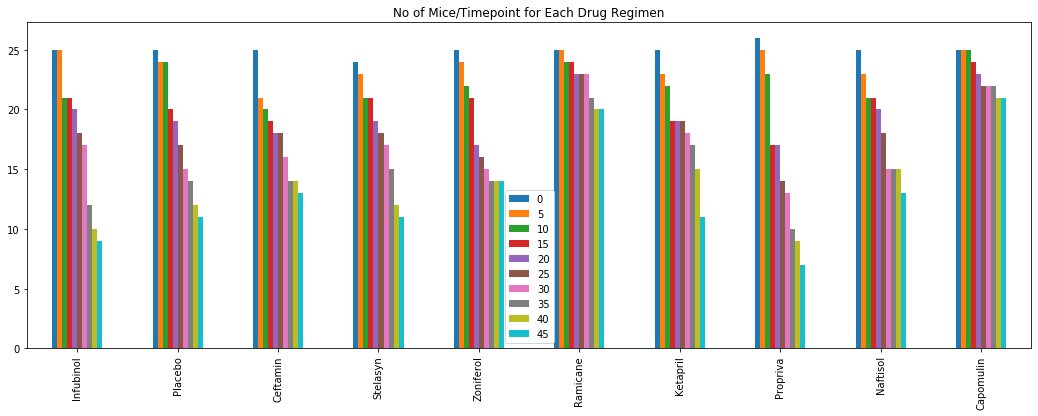

In [190]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#Make bar graph

renamed_datas_df.plot.bar(figsize=(18,6))
       
# Give the chart a title, x label, and y label
plt.title("No of Mice/Timepoint for Each Drug Regimen")

plt.savefig("MicePerTimepoint.png")
plt.show()


## Pie Plots

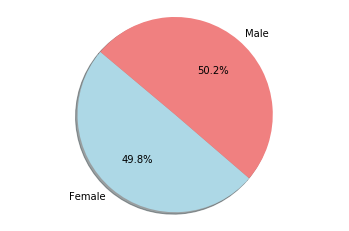

In [191]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
micegender = merged_df.drop_duplicates(subset=['Mouse ID'])
female = micegender.Sex.value_counts()['Female']
male = micegender.Sex.value_counts()['Male']
genders = [124,125]
colors = ["lightblue","lightcoral"]
labels = ["Female", "Male"]        
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(genders, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("GendersPieChart.png")
plt.show()

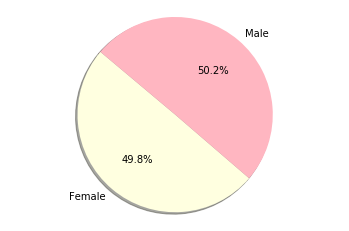

In [192]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
micegender = merged_df.drop_duplicates(subset=['Mouse ID'])
female = micegender.Sex.value_counts()['Female']
male = micegender.Sex.value_counts()['Male']
genders = [124,125]
colors = ["lightyellow","lightpink"]
labels = ["Female", "Male"]        
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(genders, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("GendersPieChart.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [226]:
top4_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,b128,Female,9,22,45,38.982878,2
Capomulin,b742,Male,7,21,45,38.939633,0
Capomulin,f966,Male,16,17,20,30.485985,0
Capomulin,g288,Male,3,19,45,37.074024,1
Capomulin,g316,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...
Ceftamin,x226,Male,23,28,0,45.000000,0
Ceftamin,x581,Female,19,28,45,64.634949,3
Ceftamin,x822,Male,3,29,45,61.386660,3


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
